In [115]:
from pdbecommon.database import Database
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [132]:
from sqlalchemy import create_engine
db_user = #######
db_pass = #######
db_sid  = #######

engine = create_engine('oracle://'+db_user+':'+db_pass+'@'+db_sid)
connection = engine.connect()


In [117]:
year_list = range(2000, 2019)

In [133]:
final_list = []
for years in year_list:
    result_list = []


    rows = connection.execute(("select reflns_shell.rmerge_i_obs"
                              " from reflns_shell, entry "
                          "where  rmerge_i_obs is not null and ordinal = '1' "
                            "and rmerge_i_obs < 5"
                          "and entry.id = reflns_shell.entry_id "
                          "and extract(year from first_rev_date) = '{}'").format(years))

    for x in rows:
        result_list.append(x)
    

    final_list.append(result_list)

In [134]:
array_from_list = np.array(final_list)


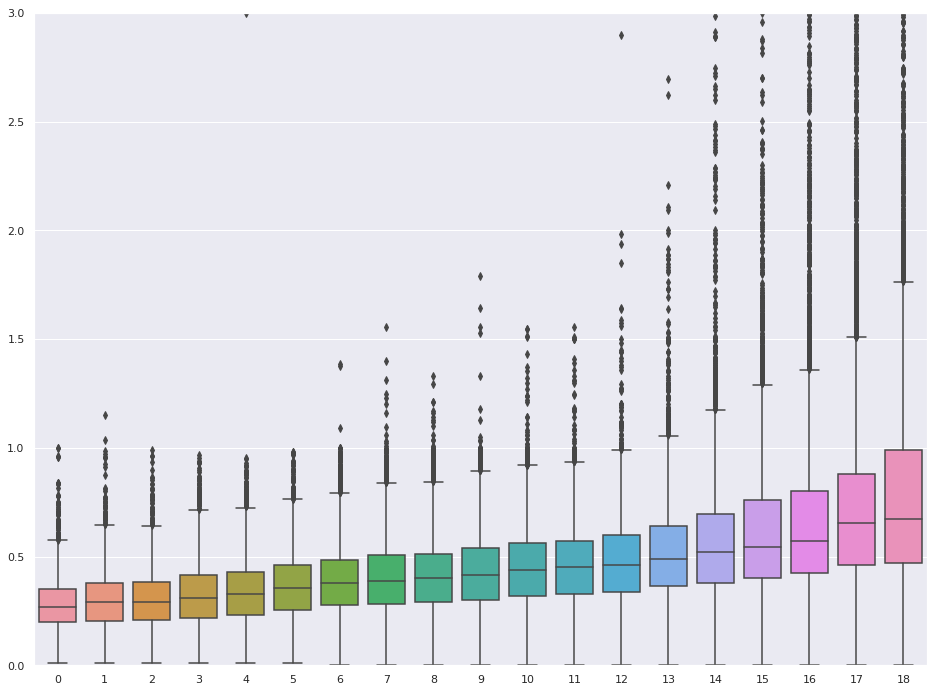

In [135]:
sns.boxplot(data=array_from_list)# plot type box 
plt.ylim(0, 3) # arrange y axis 
sns.set(rc={'figure.figsize':(16,12)}) # figsize
plt.savefig('ax.png')

In [136]:
from scipy import stats

In [138]:
for arr in array_from_list:
    print(stats.describe(arr)) # print out stats of each year
    

DescribeResult(nobs=1589, minmax=(array([0.01]), array([1.])), mean=array([0.28882329]), variance=array([0.01997167]), skewness=array([1.20747834]), kurtosis=array([2.72138059]))
DescribeResult(nobs=1765, minmax=(array([0.0106]), array([1.153])), mean=array([0.30625183]), variance=array([0.02176158]), skewness=array([1.06011416]), kurtosis=array([2.34766517]))
DescribeResult(nobs=1529, minmax=(array([0.00991]), array([0.99])), mean=array([0.30775024]), variance=array([0.02147077]), skewness=array([0.99303709]), kurtosis=array([1.78474138]))
DescribeResult(nobs=2020, minmax=(array([0.01]), array([0.965])), mean=array([0.33026484]), variance=array([0.0254635]), skewness=array([0.8181538]), kurtosis=array([0.99759635]))
DescribeResult(nobs=2370, minmax=(array([0.01084]), array([3.])), mean=array([0.34344246]), variance=array([0.02855385]), skewness=array([2.2282319]), kurtosis=array([25.82399253]))
DescribeResult(nobs=2409, minmax=(array([0.00997]), array([0.981])), mean=array([0.3703369]